In [1]:
import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors

import rasterio
from rasterio.plot import show

from sklearn import linear_model
import os
from matplotlib.animation import FuncAnimation


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.family'] = 'serif'

In [4]:
plt.rcParams['axes.titleweight'] = 'bold'

In [5]:
#baseline = rasterio.open('Amazon_ACD_2003_500m_Mgha.tif')
change = rasterio.open('Amazon_ACD_Change_2003_2016_500m_Mgha.tif')

In [6]:
print(change.width)
print(change.height)
print(change.bounds)
print(change.transform)
print(change.indexes)

8540
6773
BoundingBox(left=-8803405.32670005, bottom=-2019579.70229995, right=-4846714.86870007, top=1118437.21480004)
| 463.31, 0.00,-8803405.33|
| 0.00,-463.31, 1118437.21|
| 0.00, 0.00, 1.00|
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)


In [7]:
def sum_array_up_to(n):
    
    cumulative_change = np.zeros((change.height, change.width))
    for n in range(1,n+1):
        cumulative_change = np.add(cumulative_change,ma.masked_equal(change.read(n), -32768))
    return cumulative_change

In [8]:
max_idx = max(change.indexes)
cumulative_change = sum_array_up_to(max_idx)

In [9]:
#vmin = change_dict[13].min()
#vmax = change_dict[13].max()

In [10]:
top = cm.get_cmap('Reds_r', 128)
bottom = cm.get_cmap('Greens', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors,name='RedGreen')

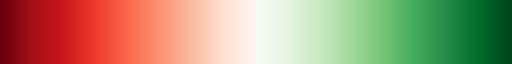

In [11]:
newcmp

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
#ax.set_axis_off()
ax.imshow(cumulative_change, norm=colors.CenteredNorm(),cmap=newcmp)

'''ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False)
'''
ticks = [-6,-3,0,3,6]


ax.set_title('Cummulative above-ground carbon density change for 2003-2016')
cbar = fig.colorbar( plt.cm.ScalarMappable(cmap=newcmp), ticks=ticks,location = 'bottom', label='MgC ha−1')
cbar.set_ticks(ticks)
#cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
fig.tight_layout()

plt.savefig('original-plot')

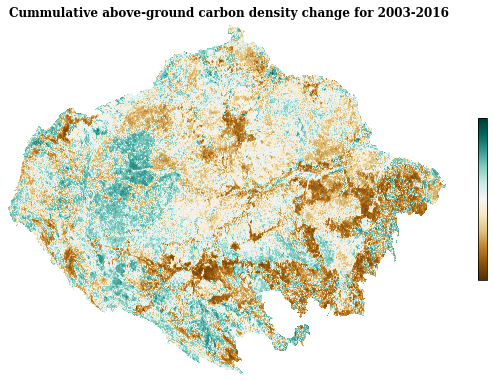

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_axis_off()
ax.set_title('Cummulative above-ground carbon density change for 2003-2016')
fig.colorbar(plt.cm.ScalarMappable(norm=colors.SymLogNorm(linthresh=1), cmap='BrBG'),
             ax=ax, orientation='vertical', label='', shrink = 0.3)
fig.tight_layout()
ax.imshow(cumulative_change,norm=colors.SymLogNorm(linthresh=1),cmap='BrBG')
plt.savefig('new-plot')

In [ ]:
change_dict = {}
for idx in change.indexes:
    cumulative_change = sum_array_up_to(idx)
    change_dict[idx] = cumulative_change

In [ ]:
num_frames = len(change.indexes)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_axis_off()
ax.set_title('Annual above-ground carbon density change for 2003-2016')

filename = 'amazon-carbon'
outfile = filename + str(num_frames) + 'frames.gif'
print(outfile)

plot = ax.imshow(change_dict[1],norm=colors.SymLogNorm(linthresh=1),cmap='BrBG')
fig.colorbar(plt.cm.ScalarMappable(norm=colors.SymLogNorm(linthresh=1), cmap='BrBG'),
             ax=ax, orientation='vertical', label='', shrink = 0.3)
fig.tight_layout()

# not os.path.isfile(outfile):
def init():
    return [plot]


def animate(i):

    plot = ax.imshow(change_dict[i+1],norm=colors.SymLogNorm(linthresh=1),cmap='BrBG')
    return [plot]



ani = FuncAnimation(fig, animate,interval=700,init_func=init,frames=num_frames,repeat=False, blit=True)

#ani.save('animation.gif')



#writer=animation.PillowWriter()

#writer = animation.FFMpegWriter(fps=2,bitrate=1000)

ani.save(outfile,dpi=100)
#fig.show()
